In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.optimize import curve_fit
!git clone https://github.com/JCLMantilla/LabIntermedio
def get_uncertainty(number):
  number=str(number)
  point_pos=0
  dig=len(number)-1
  for i in range(len(number)):
    if number[i]==".":
      point_pos=i
  uncertainty=1/(10**(abs(dig-point_pos)))
  return uncertainty
def get_uncertainty_dframe(dframe):
  new_dframe=dframe.copy()
  for column in new_dframe.columns:
    for index in new_dframe.index:
      new_dframe.loc[index,column]=get_uncertainty(new_dframe.loc[index,column])
  return new_dframe

Cloning into 'LabIntermedio'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 60 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (60/60), done.


In [2]:
data2=pd.read_csv(filepath_or_buffer="/content/LabIntermedio/RHvsT.csv",delimiter=";",float_precision="round_trip")
### Vamos a pasar T a [K] y V a [V] ###
data2["TN"]=data2["TN"]+273.15
data2["TP"]=data2["TP"]+273.15
data2["VHN"]=data2["VHN"]/1000
data2["VHP"]=data2["VHP"]/1000
T_error=0.01
V_error=0.00001
### Constantes importantes ###
w=1.0e-3    #En metros
I=30.0/1000 #En amperios
B=300.0/1000#En Teslas
B_error=0.01
I_error=0.001
w_error=0.0001
data2

,TN,VHN,TP,VHP
0,294.15,-0.02185,327.15,0.02191
1,296.15,-0.02197,329.15,0.02139
2,302.15,-0.02257,330.15,0.02098
3,306.15,-0.02261,334.15,0.02000
4,318.15,-0.02139,338.15,0.01982
5,324.15,-0.02011,341.15,0.01886
6,335.15,-0.01825,345.15,0.01850
7,338.15,-0.01777,351.15,0.01737
8,345.15,-0.01671,359.15,0.01506
9,348.15,-0.01591,364.15,0.01374


In [3]:
RHN=data2["VHN"]*w/(I*B)
RHP=data2["VHP"][:25]*w/(I*B)
RHN_error=np.sqrt((V_error*(w/(I*B)))**2  +(w_error*(data2["VHN"]/(I*B)))**2  +(I_error*(data2["VHN"]/(B*(I**2))))**2  +(B_error*(data2["VHN"]/(I*(B**2))))**2)
RHP_error=np.sqrt((V_error*(w/(I*B)))**2  +(w_error*(data2["VHP"]/(I*B)))**2  +(I_error*(data2["VHP"]/(B*(I**2))))**2  +(B_error*(data2["VHP"]/(I*(B**2))))**2)

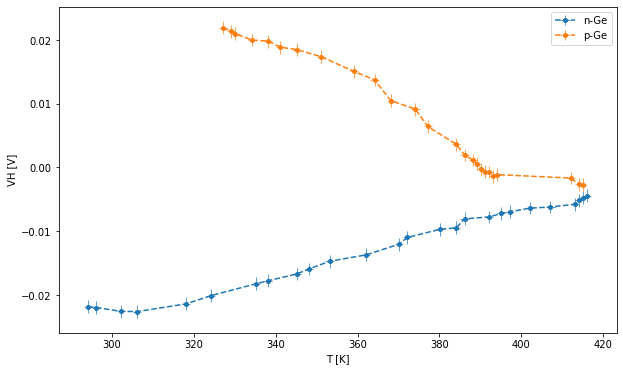

In [4]:
plt.figure(figsize=(10,6))
plt.errorbar(data2["TN"],data2["VHN"],yerr=0.001,label="n-Ge",xerr=1,linestyle='--',elinewidth=0.7,fmt="--o",markersize=4)
plt.errorbar(data2["TP"][:25],data2["VHP"][:25],yerr=0.001,xerr=1,label="p-Ge",linestyle='--',elinewidth=0.7,fmt="--o",markersize=4)
plt.ylabel("VH [V]")
plt.xlabel("T [K]")
plt.legend()

4.059054191476856e-20
-2.3418267484120984e-22
5.94450207213519e-20
-5.619958022758037e-22


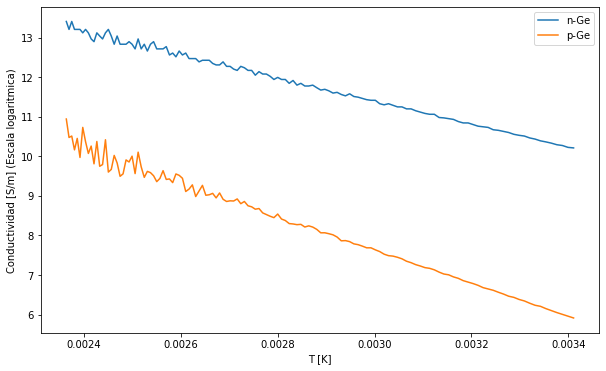

In [36]:
datos=pd.read_csv(filepath_or_buffer="/content/LabIntermedio/VLvsT.csv",delimiter=";",float_precision="round_trip")
datos["TN"]=datos["TN"]+273.15
datos["TP"]=datos["TP"]+273.15
datos["VN"]=datos["VN"]/1000
datos["VP"]=datos["VP"]/1000

L=0.02   #en m
A=1.0e-5 #en m**2
K_boltz=1.38e-23
T_error=1
V_error=1.0e-5
I=30.0/1000 #Corriente en [A]
#Pilas con el error de R

### Usamos Ohm para pasar de V a R ###
datos["VN"]=datos["VN"]/I
datos["VP"]=datos["VP"]/I
### Pasamos R a conductividad ###
datos["VN"]=L/(datos["VN"]*A)
datos["VP"]=L/(datos["VP"]*A)
### Cambiamos nombres a conductividad C ###
datos=datos.rename(columns={"VN":"CN","VP":"CP"})
### Transformamos los C--> ln(C) ###
datos["CN"]=np.log(datos["CN"])
datos["CP"]=np.log(datos["CP"])

plt.figure(figsize=(10,6))
plt.plot(1/datos["TN"],datos["CN"],label="n-Ge")
plt.plot(1/datos["TP"],datos["CP"],label="p-Ge")
plt.xlabel("T [K]")
plt.ylabel("Conductividad [S/m] (Escala logaritmica)")
plt.legend()



def f(B, x):
    return B[0]*x + B[1]
linear = Model(f)
mydata = RealData(1/datos["TN"],datos["CN"], sx=0.1,sy=0.1)
myodr = ODR(mydata, linear, beta0=[0,1])
myoutput = myodr.run()
pendiente_N,corte=myoutput.beta
pendiente_error_N,_=myoutput.sd_beta
#####################
linear = Model(f)
mydata = RealData(1/datos["TP"],datos["CP"], sx=0.1,sy=0.1)
myodr = ODR(mydata, linear, beta0=[0,1])
myoutput = myodr.run()
pendiente_P,corte=myoutput.beta
pendiente_error_P,_=myoutput.sd_beta

print(-pendiente_N*K_boltz)
print(-pendiente_error_N*K_boltz)

print(-pendiente_P*K_boltz)
print(-pendiente_error_P*K_boltz)




1e-05